<a href="https://colab.research.google.com/github/mcova100-jpg/Machine_Learning/blob/main/Session_5_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Session 5

Natural Language Processing (NLP)

Files used:
* AutoAndElectronics.zip
* FarmAds.csv


---


Michael de la Maza

AI/ML

Hult International business School

Adapted from "Data Mining for Business Analytics" by Shmueli

In [ ]:
!pip install dmba

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 39.5 MB/s eta 0:00:00


In [ ]:
from zipfile import ZipFile
from sklearn.feature_extraction.text import CountVectorizer

#### Tokenization, Stemming, Stop Words

In [ ]:
import pandas as pd

# Prints word frequencies in a document
def printTermDocumentMatrix(vectorizer, matrix):

    feature_names = vectorizer.get_feature_names_out()
    count_array = matrix.toarray()
    df = pd.DataFrame(data=count_array,columns = feature_names)

    print(df)

In [ ]:
# Example: create count vectors

text = ['the cat and the dog are playing',
        'the cat is playing',
        'hi! :)',
        'i like ham & Eggs',
        'the chicken plays with the eggs?',
        'the quick brown fox jumps over the lazy dog']

# Extract tokens from text
# A token is lower and upper case plus !,:,)
count_vect = CountVectorizer(token_pattern='[a-zA-Z!:)&]+')
counts = count_vect.fit_transform(text)

printTermDocumentMatrix(count_vect, counts)

# Notice that 'eggs?' does not appear


   &  :)  and  are  brown  cat  chicken  dog  eggs  fox  ...  is  jumps  lazy  \
0  0   0    1    1      0    1        0    1     0    0  ...   0      0     0   
1  0   0    0    0      0    1        0    0     0    0  ...   1      0     0   
2  0   1    0    0      0    0        0    0     0    0  ...   0      0     0   
3  1   0    0    0      0    0        0    0     1    0  ...   0      0     0   
4  0   0    0    0      0    0        1    0     1    0  ...   0      0     0   
5  0   0    0    0      1    0        0    1     0    1  ...   0      1     1   

   like  over  playing  plays  quick  the  with  
0     0     0        1      0      0    2     0  
1     0     0        1      0      0    1     0  
2     0     0        0      0      0    0     0  
3     1     0        0      0      0    0     0  
4     0     0        0      1      0    2     1  
5     0     1        0      0      1    2     0  

[6 rows x 23 columns]


In [ ]:
# Example: create count vectors

text = ['the cat and the dog are playing',
        'the cat is playing',
        'hi! :)',
        'i like ham & Eggs',
        'the chicken plays with the eggs?',
        'the quick brown fox jumps over the lazy dog',
        'My name is Matias',
        'How old are you',
        'the rainbow is red',
        'The dog was running in the soccer field']

# Extract tokens from text
# A token is lower and upper case plus !,:,)
count_vect = CountVectorizer(token_pattern='[a-zA-Z!:)&]+')
counts = count_vect.fit_transform(text)

printTermDocumentMatrix(count_vect, counts)

# Notice that 'eggs?' does not appear

   &  :)  and  are  brown  cat  chicken  dog  eggs  field  ...  plays  quick  \
0  0   0    1    1      0    1        0    1     0      0  ...      0      0   
1  0   0    0    0      0    1        0    0     0      0  ...      0      0   
2  0   1    0    0      0    0        0    0     0      0  ...      0      0   
3  1   0    0    0      0    0        0    0     1      0  ...      0      0   
4  0   0    0    0      0    0        1    0     1      0  ...      1      0   
5  0   0    0    0      1    0        0    1     0      0  ...      0      1   
6  0   0    0    0      0    0        0    0     0      0  ...      0      0   
7  0   0    0    1      0    0        0    0     0      0  ...      0      0   
8  0   0    0    0      0    0        0    0     0      0  ...      0      0   
9  0   0    0    0      0    0        0    1     0      1  ...      0      0   

   rainbow  red  running  soccer  the  was  with  you  
0        0    0        0       0    2    0     0    0  
1      

In [ ]:
# 5 minute exercise
#Try with different sentences. Do you get what you expect?



In [ ]:
# 5 minute exercise
# Change CountVectorizer to include &. What does this do? Can you give an example?

In [ ]:
# filter out stop words
count_vect = CountVectorizer(stop_words='english') # built in list of stop words
counts = count_vect.fit_transform(text)

printTermDocumentMatrix(count_vect, counts)

feature_names = count_vect.get_feature_names_out()
for i in range(counts.shape[0]): # will see a nicer way to do this later
    print(" ".join([feature_names[j] for j in counts[i].indices]))


   brown  cat  chicken  dog  eggs  field  fox  ham  hi  jumps  ...  like  \
0      0    1        0    1     0      0    0    0   0      0  ...     0   
1      0    1        0    0     0      0    0    0   0      0  ...     0   
2      0    0        0    0     0      0    0    0   1      0  ...     0   
3      0    0        0    0     1      0    0    1   0      0  ...     1   
4      0    0        1    0     1      0    0    0   0      0  ...     0   
5      1    0        0    1     0      0    1    0   0      1  ...     0   
6      0    0        0    0     0      0    0    0   0      0  ...     0   
7      0    0        0    0     0      0    0    0   0      0  ...     0   
8      0    0        0    0     0      0    0    0   0      0  ...     0   
9      0    0        0    1     0      1    0    0   0      0  ...     0   

   matias  old  playing  plays  quick  rainbow  red  running  soccer  
0       0    0        1      0      0        0    0        0       0  
1       0    0       

In [ ]:
# Stem words

from nltk.stem import PorterStemmer
ps = PorterStemmer()

print('eggs => ', ps.stem('eggs'))
print('running => ', ps.stem('running'))

print('arguing => ', ps.stem('arguing'))
print('argue => ', ps.stem('argue'))

for i in range(counts.shape[0]):
    words = [feature_names[j] for j in counts[i].indices]
    stemmed_words = [ps.stem(word) for word in words]
    stemmed_sentence = ' '.join(stemmed_words)
    print(stemmed_sentence)

eggs =>  egg
running =>  run
arguing =>  argu
argue =>  argu
cat dog play
cat play
hi
like ham egg
egg chicken play
dog quick brown fox jump lazi
matia
old
rainbow red
dog run soccer field


In [ ]:
# 5 minute exercise
# Use ps.stem to stem words of your choosing. Are any of the results unexpected?
# arguing
# arrangement & arrange
# people

#### Case study: Internet discussion posts

Classify posts as related to autos or electronics

In [ ]:
import dmba

corpus = []
label = []
with ZipFile(dmba.get_data_file('AutoAndElectronics.zip')) as rawData:
    for info in rawData.infolist():
        if info.is_dir():
            continue
        label.append(1 if 'rec.autos' in info.filename else 0)
        corpus.append(rawData.read(info))

Colab environment detected.


In [ ]:
# print first item
corpus[0]

b"Path: cantaloupe.srv.cs.cmu.edu!das-news.harvard.edu!ogicse!uwm.edu!wupost!uunet!brunix!cs.brown.edu!cs012055\nFrom: cs012055@cs.brown.edu (Hok-Chung Tsang)\nNewsgroups: rec.autos\nSubject: Re: Saturn's Pricing Policy\nMessage-ID: <1993Apr5.230808.581@cs.brown.edu>\nDate: 5 Apr 93 23:08:08 GMT\nArticle-I.D.: cs.1993Apr5.230808.581\nReferences: <C4oxwp.KKM@news.cso.uiuc.edu> <C4vIr5.L3r@shuksan.ds.boeing.com>\nSender: news@cs.brown.edu\nOrganization: Brown Computer Science Dept.\nLines: 51\n\nIn article <C4vIr5.L3r@shuksan.ds.boeing.com>, fredd@shuksan (Fred Dickey) writes:\n|> CarolinaFan@uiuc (cka52397@uxa.cso.uiuc.edu) wrote:\n|> : \tI have been active in defending Saturn lately on the net and would\n|> : like to state my full opinion on the subject, rather than just reply to others'\n|> : points.\n|> : \t\n|> : \tThe biggest problem some people seem to be having is that Saturn\n|> : Dealers make ~$2K on a car.  I think most will agree with me that the car is\n|> : comparably price

In [ ]:
# 5 minute exercise
# Print first five items
# Indicate whether they are about 'autos' or 'electronics'

In [ ]:
# Tokenize

count_vect = CountVectorizer(token_pattern='[a-zA-Z!:)]+', encoding='latin1')
counts = count_vect.fit_transform(corpus)

In [ ]:
print(" ".join(count_vect.inverse_transform(counts[0])[0]))

path: cantaloupe srv cs cmu edu!das news harvard edu!ogicse!uwm edu!wupost!uunet!brunix!cs brown edu!cs from: edu hok chung tsang) newsgroups: rec autos subject: re: saturn s pricing policy message id: apr date: : gmt article i d references: c oxwp kkm cso uiuc vir l r shuksan ds boeing com sender: organization: computer science dept lines: in fredd fred dickey) writes: carolinafan cka uxa edu) wrote: have been active defending lately on the net and would like to state my full opinion subject rather than just reply others points biggest problem some people seem be having is that dealers make k a car think most will agree with me comparably priced its competitors they aren t overpriced compared cars their class don understand point of arguing over whether dealer makes or not never understood what big deal profits either only thing can figure out believe if minimize profit total pocket expenses for while this may true cases do it generally bought sl january at time based studying prices 

In [ ]:
# Magic code that does all preprocessing at once - stem, stop, etc.
# Warning expected

import nltk # Natural Language Toolkit
nltk.download('punkt')
nltk.download('punkt_tab') # Download the missing 'punkt_tab' resource
from nltk import word_tokenize
from nltk.stem.snowball import EnglishStemmer
from sklearn.feature_extraction._stop_words import ENGLISH_STOP_WORDS

class LemmaTokenizer(object):
    def __init__(self):
        self.stemmer = EnglishStemmer()
        self.stopWords = set(ENGLISH_STOP_WORDS)

    def __call__(self, doc):
        return [self.stemmer.stem(t) for t in word_tokenize(doc)
                if t.isalpha() and t not in self.stopWords]

# Learn features based on text
count_vect = CountVectorizer(tokenizer=LemmaTokenizer(), encoding='latin1')
counts = count_vect.fit_transform(corpus)

# Print first
print(" ".join(count_vect.inverse_transform(counts[0])[0]))


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
/usr/local/lib/python3.12/dist-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


path ogics wupost uunet brunix tsang newsgroup subject saturn price polici date apr gmt refer sender news organ brown comput scienc dept line articl fredd shuksan fred dickey write carolinafan uiuc wrote activ defend late net like state opinion just repli point biggest problem peopl have dealer make car think agre compar competitor overpr class understand argu understood big deal profit thing figur believ minim total expens true case general bought sl januari time base studi decid cheapli sure mayb talk differ import money left buy reduc save experi doe necessarili say pay realli margin better market averag attract forc lower surviv owner benefit buyer doug


In [ ]:
# Use more sophisticated version of frequency count
# TFIDF - term frequency/ inverse document frequency
# Gives more weight to words that are unique to a document

from sklearn.feature_extraction.text import TfidfTransformer

tfidfTransformer = TfidfTransformer()
tfidf = tfidfTransformer.fit_transform(counts)

In [ ]:
tfidf[0]

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 106 stored elements and shape (1, 13516)>

In [ ]:
# Use only top 10 dimensions
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import Normalizer
from sklearn.pipeline import make_pipeline

svd = TruncatedSVD(10)
normalizer = Normalizer(copy=False)
lsa = make_pipeline(svd, normalizer)

lsa_tfidf = lsa.fit_transform(tfidf)

In [ ]:
lsa_tfidf[0]

array([ 0.50920969,  0.53681879, -0.07523065,  0.08508218,  0.10116376,
       -0.17052942, -0.53508662, -0.02549168,  0.25829989,  0.21594376])

In [ ]:
# First five are all same category
label[0:5]

[1, 1, 1, 1, 1]

In [ ]:

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from dmba import classificationSummary
from sklearn.neural_network import MLPClassifier

# Create training and testing set
Xtrain, Xtest, ytrain, ytest = train_test_split(lsa_tfidf, label, test_size=0.4, random_state=42)


# Initialize
nn = MLPClassifier(random_state=42)

# Fit model
nn.fit(Xtrain, ytrain)

classificationSummary(ytest, nn.predict(Xtest))




Confusion Matrix (Accuracy 0.9650)

       Prediction
Actual   0   1
     0 390   7
     1  21 382


/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
# Increase number of iterations (epochs)
nn_long = MLPClassifier(max_iter=500, random_state=42)

nn_long.fit(Xtrain, ytrain)

classificationSummary(ytest, nn_long.predict(Xtest))

Confusion Matrix (Accuracy 0.9600)

       Prediction
Actual   0   1
     0 390   7
     1  25 378


/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
# 5 minute exercise
# How many iterations are needed for it to converge?

In [ ]:
# Can also try decision trees

# run decision tree model on training
dt = DecisionTreeClassifier(random_state=1)
dt.fit(Xtrain, ytrain)

# print confusion matrix and accuracty
classificationSummary(ytest, dt.predict(Xtest))

# run random forest classifier model on training
rf = RandomForestClassifier(n_estimators=500, random_state=1)
rf.fit(Xtrain, ytrain)

# print confusion matrix and accuracty
classificationSummary(ytest, rf.predict(Xtest))

Confusion Matrix (Accuracy 0.9387)

       Prediction
Actual   0   1
     0 377  20
     1  29 374
Confusion Matrix (Accuracy 0.9625)

       Prediction
Actual   0   1
     0 388   9
     1  21 382


In [ ]:


# Two hidden layers with 8 neurons each
nn_2layer = MLPClassifier(hidden_layer_sizes=(32, 32, 32, 32, 32, 32, 32, 32, 32, 32), random_state=42)

# Fit the model to the training data
nn_2layer.fit(Xtrain, ytrain)

classificationSummary(ytest, nn_2layer.predict(Xtest))

Confusion Matrix (Accuracy 0.9525)

       Prediction
Actual   0   1
     0 382  15
     1  23 380


In [ ]:
# 5 minute Exercise
# Can you find a neural network architecture that has an accuracy greater than 96%?
# Vary the number of hidden layers and the number of neurons in each layer


#### Case study: Spam ads

You are running an online agriculture site. Your revenue primarily comes from ads. To maintain your ethical standards, you do not want to run ads that are spam.

Build a classifier that determines whether or not an ad is spam.

In [ ]:
# Exercise: Examine farm-ads.csv.
# What do you see?
# What are the differences between spam ads (target: -1) and good ads (target: 1)?
# What are the spam ads about? What words do they have in common?
# What are the good ads about? What words do they have in common?

In [ ]:
# Read in ads

import dmba

farm_ads = dmba.load_data('farm-ads.csv', names=['relevance', 'text'])

print('{} relevant ads'.format(len(farm_ads[farm_ads.relevance == 1])))
print(farm_ads[farm_ads.relevance == 1].head())

print('{} non-relevant ads'.format(len(farm_ads[farm_ads.relevance == -1])))
print(farm_ads[farm_ads.relevance == -1].head())

2210 relevant ads
      relevance                                               text
1933          1   ad-abdominal ad-aortic ad-aneurysm ad-million...
1934          1   ad-ac ad-montana ad-ranch ad-horse ad-cattle ...
1935          1   ad-acai ad-pure ad-product ad-amazon title-ac...
1936          1   ad-acclaim ad-website ad-builder ad-design ad...
1937          1   ad-acclaim ad-website ad-builder ad-design ad...
1933 non-relevant ads
   relevance                                               text
0         -1   ad-abdominal ad-aortic ad-aneurysm ad-doctorf...
1         -1   ad-abdominal ad-aortic ad-aneurysm ad-million...
2         -1   ad-absorbent ad-oil ad-snar ad-factory ad-dir...
3         -1   ad-acid ad-reflux ad-relief ad-top ad-treatme...
4         -1   ad-acid ad-reflux ad-symptom ad-acid ad-reflu...


In [ ]:
# Tokenize and create TFID

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

count_vect = CountVectorizer(token_pattern='[a-zA-Z-]+')
tfidfTransformer = TfidfTransformer(smooth_idf=False, norm=None)

counts = count_vect.fit_transform(farm_ads['text'])
tfidf = tfidfTransformer.fit_transform(counts)

In [ ]:
# Latent Semantic Analysis - 20 concepts

from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import Normalizer
from sklearn.pipeline import make_pipeline

svd = TruncatedSVD(20)
normalizer = Normalizer(copy=False)
lsa = make_pipeline(svd, normalizer)

lsa_tfidf = lsa.fit_transform(tfidf)

In [ ]:
# Examine term-document matrix
# Remember that this matrix indicates which terms (tokens) are in which document

shape = counts.shape
print('Term-document matrix: {0[1]} terms, {0[0]} documents'.format(shape))
print('   Size of the matrix: {}'.format(counts.size))
print('  sparsity: {:.0f}%\n'.format(100 * counts.size / (shape[0] * shape[1])))

print(counts[:,0])

Term-document matrix: 58047 terms, 4143 documents
   Size of the matrix: 640792
  sparsity: 0%

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 24 stored elements and shape (4143, 1)>
  Coords	Values
  (1011, 0)	1
  (1193, 0)	1
  (1546, 0)	1
  (1562, 0)	1
  (1789, 0)	1
  (1790, 0)	1
  (1935, 0)	11
  (2110, 0)	6
  (2229, 0)	1
  (2337, 0)	1
  (2381, 0)	1
  (2475, 0)	1
  (2532, 0)	1
  (2731, 0)	1
  (2741, 0)	1
  (2910, 0)	1
  (3014, 0)	2
  (3018, 0)	1
  (3047, 0)	2
  (3272, 0)	2
  (3432, 0)	2
  (3606, 0)	1
  (3685, 0)	4
  (3851, 0)	14


In [ ]:
# Build intuition by examining terms

import pandas as pd

fromTerm = 5340
toTerm = 5350

index = count_vect.get_feature_names_out()[fromTerm:toTerm]
pd.DataFrame(data=counts[0:20,fromTerm:toTerm].toarray().transpose(), index=index)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
adconfirm,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
adconfirmemail,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
adconfirmemailaddress,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
adconfirmemailaddressreceive,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
add,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0
addadhdadrenalfatigueagelongevityallergyfood,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
addax,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
addchoice,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
addcommentadminpage,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
addcompare,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Document 7 - term 5344:  3
Document 8 - term 5344:  0
Average occurrence of term 5344 in all documents: 0.5614289162442674


<Axes: >

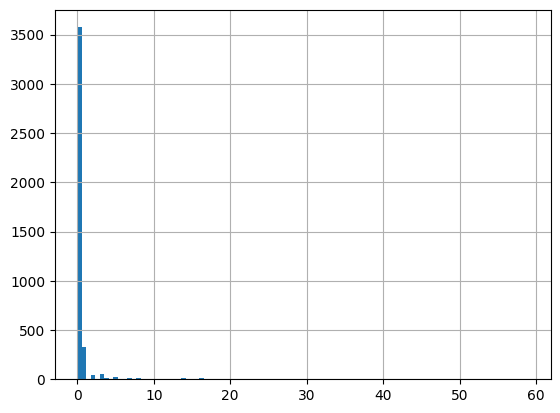

In [ ]:
# 'add' occurs three times in document 7

import numpy as np
print('Document 7 - term 5344: ', counts[7, 5344])
print('Document 8 - term 5344: ', counts[8, 5344])
print('Average occurrence of term 5344 in all documents:', np.sum(counts[:, 5344]) / counts.shape[0])

pd.Series([c.toarray()[0, 0] for c in counts[:, 5344]]).hist(bins=100)

In [ ]:
# Exercise: Repeat this with a different term
# Comment on the distribution of the term in the documents

In [ ]:
# Train neural network classifier
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from dmba import classificationSummary

train_X, valid_X, train_y, valid_y = train_test_split(lsa_tfidf, farm_ads.relevance, test_size=0.25, random_state=42)

neural_net = MLPClassifier(hidden_layer_sizes=(50,50), activation='relu', solver='adam', max_iter=2000)

# Train the neural network on the training data
neural_net.fit(train_X, train_y)

# Print confusion matrix and accuracy on the validation set
classificationSummary(valid_y, neural_net.predict(valid_X), class_names=neural_net.classes_)

Confusion Matrix (Accuracy 0.8880)

       Prediction
Actual  -1   1
    -1 439  65
     1  51 481


In [ ]:
# 5 minute exercise
# Improve the classification performance by changing the number of parameters
# Try changing the number of hidden layers, the number of neurons in each layer

In [ ]:
# Train neural network classifier
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from dmba import classificationSummary

train_X, valid_X, train_y, valid_y = train_test_split(lsa_tfidf, farm_ads.relevance, test_size=0.25, random_state=42)

neural_net = MLPClassifier(hidden_layer_sizes=(150,150), activation='relu', solver='adam', max_iter=2000)

# Train the neural network on the training data
neural_net.fit(train_X, train_y)

# Print confusion matrix and accuracy on the validation set
classificationSummary(valid_y, neural_net.predict(valid_X), class_names=neural_net.classes_)

Confusion Matrix (Accuracy 0.8996)

       Prediction
Actual  -1   1
    -1 448  56
     1  48 484


In [ ]:
# Now let's try a simple decision tree
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier(random_state=42)

decision_tree.fit(train_X, train_y)


classificationSummary(valid_y, decision_tree.predict(valid_X), class_names=decision_tree.classes_)

Confusion Matrix (Accuracy 0.8552)

       Prediction
Actual  -1   1
    -1 423  81
     1  69 463


In [ ]:
# Exercise: Improve the classification performance by changing the hyperparameters
# Try adjusting max_depth, min_samples_split


In [ ]:
# Now we will try a Random Forest!
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(n_estimators=600, random_state=42)

random_forest.fit(train_X, train_y)

classificationSummary(valid_y, random_forest.predict(valid_X), class_names=random_forest.classes_)

Confusion Matrix (Accuracy 0.9064)

       Prediction
Actual  -1   1
    -1 433  71
     1  26 506


In [ ]:
# Exercise: Improve the classification performance by changing the hyperparameters


#### Clustering



In [ ]:
# Load data

from zipfile import ZipFile
import dmba

corpus = []
with ZipFile(dmba.get_data_file('AutoAndElectronics.zip')) as rawData:
    for info in rawData.infolist():
        if info.is_dir():
            continue
        corpus.append(rawData.read(info))

In [ ]:
# Preprocessing: Stem, tokenize, stop words
from sklearn.feature_extraction.text import CountVectorizer
from nltk.stem.snowball import EnglishStemmer
from sklearn.feature_extraction._stop_words import ENGLISH_STOP_WORDS
import nltk
nltk.download('punkt')
from nltk import word_tokenize

class LemmaTokenizer(object):
    def __init__(self):
        self.stemmer = EnglishStemmer()
        self.stopWords = set(ENGLISH_STOP_WORDS)

    def __call__(self, doc):
        return [self.stemmer.stem(t) for t in word_tokenize(doc)
                if t.isalpha() and t not in self.stopWords]

preprocessor = CountVectorizer(tokenizer=LemmaTokenizer(), stop_words='english', encoding='latin1')
preprocessedText = preprocessor.fit_transform(corpus)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
/usr/local/lib/python3.12/dist-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [ ]:
# Latent Semantic Analysis

from sklearn.feature_extraction.text import TfidfTransformer

tfidfTransformer = TfidfTransformer()
tfidf = tfidfTransformer.fit_transform(preprocessedText)

In [ ]:
# Create 10 concepts

from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import Normalizer
from sklearn.pipeline import make_pipeline

svd = TruncatedSVD(10)
normalizer = Normalizer(copy=False)
lsa = make_pipeline(svd, normalizer)

lsa_tfidf = lsa.fit_transform(tfidf)

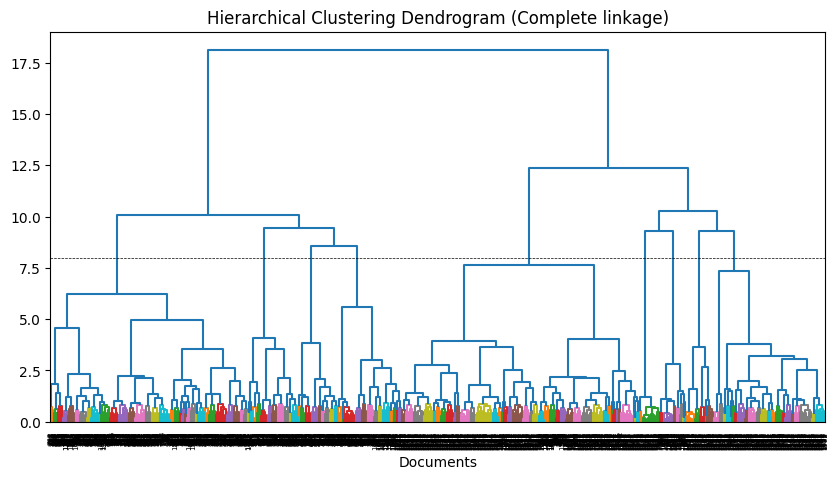

In [ ]:
# Plot hierarchical cluster
# Takes about 15 seconds
import matplotlib.pylab as plt
from scipy.cluster.hierarchy import dendrogram

fig = plt.figure(figsize=(10, 6))
fig.subplots_adjust(bottom=0.23)
plt.title('Hierarchical Clustering Dendrogram (Complete linkage)')
plt.xlabel('Documents')
dendrogram(Z, color_threshold=0.9)
plt.axhline(y=8, color='black', linewidth=0.5, linestyle='dashed')
plt.show()

# Notice that there are two large clusters, corresponding to auto and electronics?

In [ ]:
# Examine clusters
from scipy.cluster.hierarchy import fcluster

# Recluster with 20 clusters
nclusters = 20
membership = fcluster(Z, nclusters, criterion='maxclust')
for clNumber in range(1, nclusters + 1):
    nmembers = sum(membership == clNumber)
    recAutos = ['Newsgroups: rec.autos' in str(doc) for doc, cl in zip(corpus, membership) if cl == clNumber]
    ratioAutos = sum(recAutos) /nmembers
    print(f'{sum(recAutos):3d} of {nmembers:3d} : {ratioAutos:.2f} {"rec.autos" if ratioAutos > 0.9 else ""}')

 33 of  33 : 1.00 rec.autos
106 of 121 : 0.88 
147 of 154 : 0.95 rec.autos
194 of 202 : 0.96 rec.autos
 30 of  33 : 0.91 rec.autos
 95 of  95 : 1.00 rec.autos
 36 of  36 : 1.00 rec.autos
 67 of  67 : 1.00 rec.autos
 46 of  46 : 1.00 rec.autos
 96 of 119 : 0.81 
  1 of 152 : 0.01 
 13 of 203 : 0.06 
 72 of 187 : 0.39 
  4 of  71 : 0.06 
  0 of  54 : 0.00 
 31 of  66 : 0.47 
  0 of  72 : 0.00 
  0 of  27 : 0.00 
  3 of  28 : 0.11 
  4 of 234 : 0.02 


In [ ]:
# 5 minute exercise
# Try again with two clusters
# Do the two clusters correspond to auto and electronics?

In [ ]:
# K-means clustering with k=2
from sklearn.cluster import KMeans
import pandas as pd
import math

kmeans = KMeans(n_clusters=2, random_state=0, n_init='auto').fit(lsa_tfidf)



In [ ]:
# Between cluster distance
centroids = pd.DataFrame(kmeans.cluster_centers_)
print('Between-cluster distance: ', math.sqrt(sum(centroids.iloc[0, :] - centroids.iloc[1, :])**2))

Between-cluster distance:  0.9480192333593247


In [ ]:
# Intra cluster distance

withinClusterSS = [0] * 2
clusterCount = [0] * 2
for cluster, distance in zip(kmeans.labels_, kmeans.transform(lsa_tfidf)):
    withinClusterSS[cluster] += distance[cluster]**2
    clusterCount[cluster] += 1
for cluster, withClustSS in enumerate(withinClusterSS):
    count = clusterCount[cluster]
    withinClusterDispersion = math.sqrt(withClustSS / (count - 1))
    print(f'Cluster {cluster} ({count} members): {withinClusterDispersion:5.2f} within cluster')

Cluster 0 (1090 members):  0.61 within cluster
Cluster 1 (910 members):  0.63 within cluster
